Objective: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Data Source : https://www.kaggle.com/henriqueyamahata/bank-marketing

Importing all the needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

Setting a random seed of 3 inorder to re-seed the generator when needed

In [2]:
np.random.seed(3)

Reading the input file to a dataframe

In [3]:
bank = pd.read_csv("Bank_details.csv")

# Intialize Dataset Analysis

In [4]:
bank.head()

age        job  marital    education  default housing loan    contact  \
0  56.0  housemaid  married     basic.4y       no      no   no  telephone   
1  57.0   services  married  high.school  unknown      no   no  telephone   
2  37.0   services  married  high.school       no     yes   no  telephone   
3  40.0     admin.  married     basic.6y       no      no   no  telephone   
4  56.0   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1  999.0         0  nonexistent          1.1   
1   may         mon  ...         1  999.0         0  nonexistent          1.1   
2   may         mon  ...         1  999.0         0  nonexistent          1.1   
3   may         mon  ...         1  999.0         0  nonexistent          1.1   
4   may         mon  ...         1  999.0         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  37540.000000  37223.000000  38245.000000  37986.000000  38245.000000   
mean      39.817821    258.991242      2.566662    963.341968      0.170009   
std       10.307051    260.366884      2.767473    184.769471      0.487169   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    103.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     43.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  38245.000000    38245.000000   38245.000000  38245.000000  38245.000000  
mean       0.082861       93.570313     -40.541164      3.623298   5167.432566  
std        1.565945        0.576367       4.623200      1.730226     71.760333  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.444000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

To get the features names of the data

In [6]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Attribute Information

Bank client data

Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign

Contact: contact communication type (categorical: 'cellular','telephone')
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive mode

Other attributes

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
Previous: number of contacts performed before this campaign and for this client (numeric)
Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

Emp.var.rate: employment variation rate - quarterly indicator (numeric)
Cons.price.idx: consumer price index - monthly indicator (numeric)
Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
Euribor3m: euribor 3 month rate - daily indicator (numeric)
Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target)

y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [7]:
bank.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
bank.shape

(38245, 21)

Checking for the count of the null values for each of the features

In [9]:
bank.isnull().sum()

age                705
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration          1022
campaign             0
pdays              259
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Filling the missing values with the mean

In [10]:
bank['age'] = bank['age'].fillna((bank['age'].mean()))
bank['duration'] = bank['duration'].fillna((bank['duration'].mean()))
bank['pdays'] = bank['pdays'].fillna((bank['pdays'].mean()))

In [11]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Renaming some of the feature names

In [12]:
bank = bank.rename(columns= {"emp.var.rate":"emp_var_rate",
                             "cons.price.idx": "cons_price_idx",
                             "cons.conf.idx": "cons_conf_idx",
                             "nr.employed": " nr_employed",
                             "y" : "term_deposit"})

In [13]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit'],
      dtype=object)

Heat map for the highest correlated features in the bank dataset

Text(0.5, 1, 'Heatmap for highest correlated features')

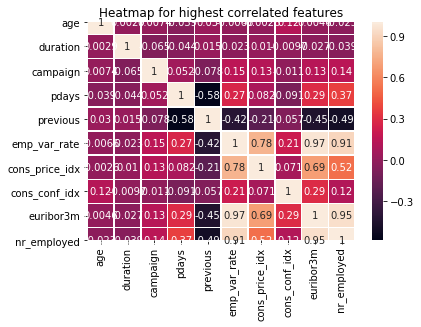

In [14]:
sns.heatmap(bank.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for highest correlated features")

Checking the unique values for job feature in the dataset

In [15]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

Checking the unique values for marital feature in the dataset

In [16]:
bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

Checking the unique values for education feature in the dataset

In [17]:
bank.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

Checking the unique values for default feature in the dataset

In [18]:
bank.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

Checking the unique values for housing feature in the dataset

In [19]:
bank.housing.unique()

array(['no', 'yes'], dtype=object)

Checking the unique values for loan feature in the dataset

In [20]:
bank.loan.unique()

array(['no', 'yes'], dtype=object)

Checking the unique values for contact feature in the dataset

In [21]:
bank.contact.unique()

array(['telephone', 'cellular'], dtype=object)

Checking the unique values for month feature in the dataset

In [22]:
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

Checking the unique values for day_of_week feature in the dataset

In [23]:
bank.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

Checking the unique values for poutcome feature in the dataset

In [24]:
bank.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

Checking the unique values for term_deposit feature in the dataset

In [25]:
bank.term_deposit.unique()

array(['no', 'yes'], dtype=object)

# Visualization of the data

Checking the distribution for the age of the customers

Text(0, 0.5, 'Count of customers')

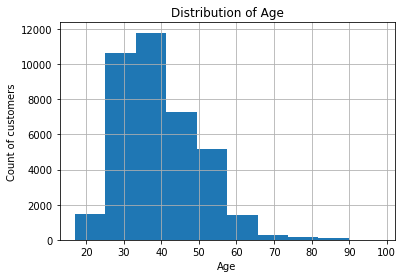

In [26]:
bank.age.hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of customers')


Checking the distribution of the target variable in the dataset

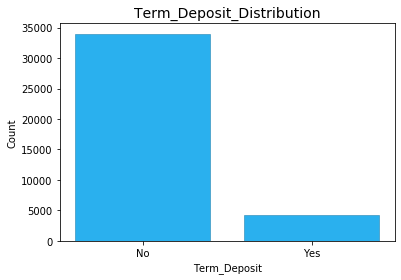

In [27]:
bank['term_deposit'].value_counts()

plt.bar(['No', 'Yes'], bank['term_deposit'].value_counts().values, facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Term_Deposit_Distribution', fontsize=14)
plt.xlabel('Term_Deposit')
plt.ylabel('Count')
plt.show()

Visualizing the distribution of the features and the target variable: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, term_deposit for the dataset

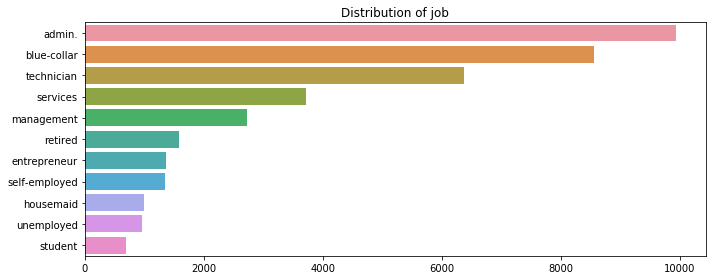

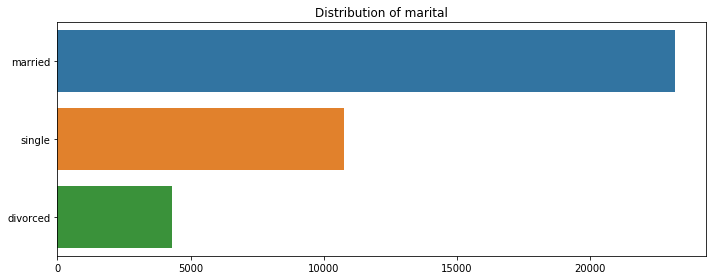

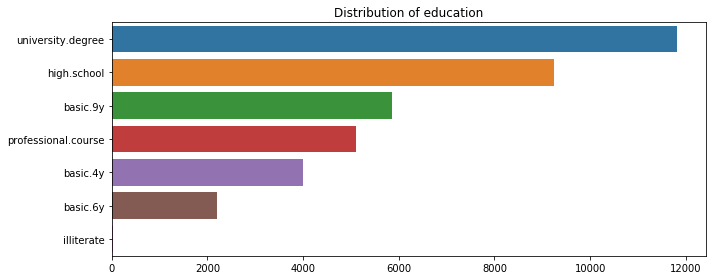

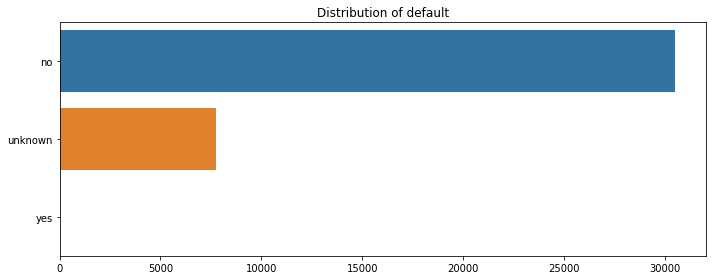

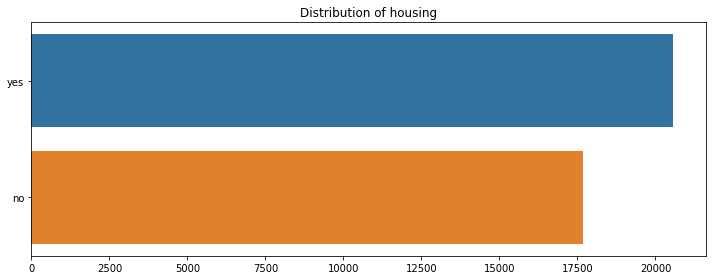

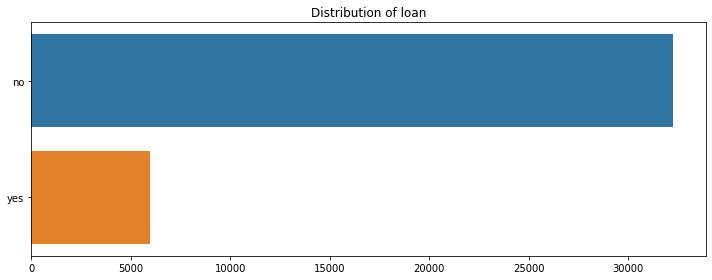

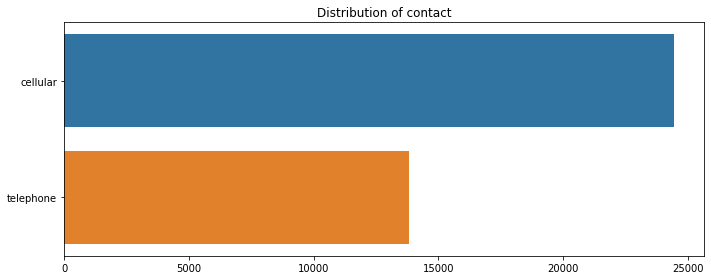

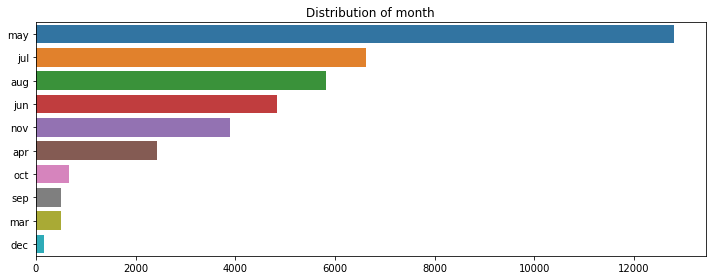

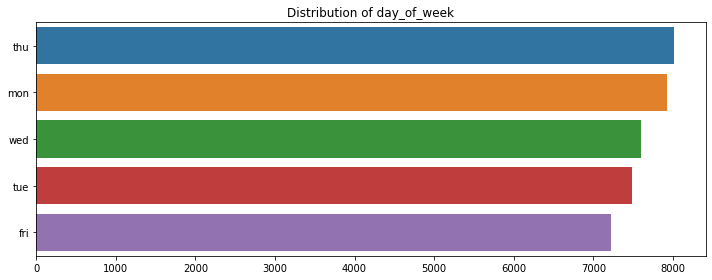

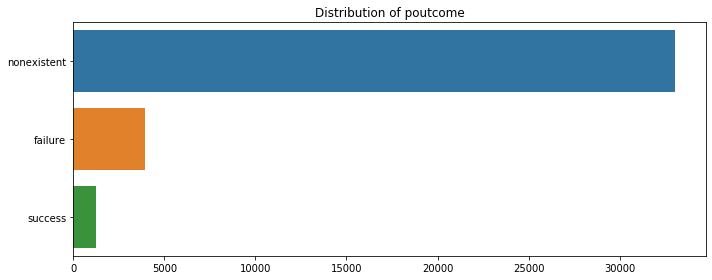

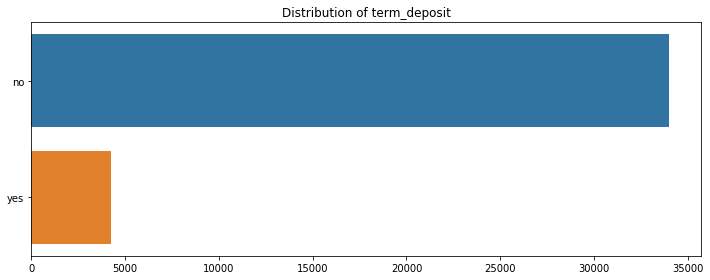

In [28]:
categorcial_variables = ['job', 'marital','education','default','housing','loan','contact','month', 'day_of_week','poutcome','term_deposit']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title("Distribution of " + col)
    plt.tight_layout()

# Data Manipulation

Creating dummy variables for the categorical features

In [29]:
bank_marital = pd.get_dummies(bank['marital'])
bank_new = pd.concat([bank, bank_marital], axis=1)
bank_new

bank_job = pd.get_dummies(bank_new['job'])
bank_new = pd.concat([bank_new, bank_job], axis=1)
bank_new

bank_education = pd.get_dummies(bank_new['education'])
bank_new = pd.concat([bank_new, bank_education], axis=1)
bank_new

bank_contact = pd.get_dummies(bank_new['contact'])
bank_new = pd.concat([bank_new, bank_contact], axis=1)
bank_new

bank_month = pd.get_dummies(bank_new['month'])
bank_new = pd.concat([bank_new, bank_month], axis=1)
bank_new

bank_day_of_week = pd.get_dummies(bank_new['day_of_week'])
bank_new = pd.concat([bank_new, bank_day_of_week], axis=1)
bank_new

bank_poutcome = pd.get_dummies(bank_new['poutcome'])
bank_new = pd.concat([bank_new, bank_poutcome], axis=1)
bank_new



age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
38240  73.0      retired  married  professional.course       no     yes   no   
38241  46.0  blue-collar  married  professional.course       no      no   no   
38242  56.0      retired  married    university.degree       no     yes   no   
38243  44.0   technician  married  professional.course       no      no   no   
38244  74.0      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  oct  sep  fri  mon thu  tue  wed  \
0      telephone   may         mon  ...    0    0    0    1   0    0    0   
1      telephone   may         mon  ...    0    0    0    1   0    0    0   
2      telephone   may         mon  ...    0    0    0    1   0    0    0   
3      telephone   may         mon  ...    0    0    0    1   0    0    0   
4      telephone   may         mon  ...    0    0    0    1   0    0    0   
...          ...   ...         ...  ...  ...  ...  ...  ...  ..  ...  ...   
38240   cellular   nov         fri  ...    0    0    1    0   0    0    0   
38241   cellular   nov         fri  ...    0    0    1    0   0    0    0   
38242   cellular   nov         fri  ...    0    0    1    0   0    0    0   
38243   cellular   nov         fri  ...    0    0    1    0   0    0    0   
38244   cellular   nov         fri  ...    0    0    1    0   0    0    0   

       failure  nonexistent  success  
0            0            1        0  
1            0            1        0  
2            0            1        0  
3            0            1        0  
4            0            1        0  
...        ...          ...      ...  
38240        0            1        0  
38241        0            1        0  
38242        0            1        0  
38243        0            1        0  
38244        1            0        0  

[38245 rows x 62 columns]

In [30]:
bank_new.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit',
       'divorced', 'married', 'single', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'], dtype=object)

Using LabelEncoder to encode values for the features

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_new['default'] = labelencoder_X.fit_transform(bank_new['default'])
bank_new['housing'] = labelencoder_X.fit_transform(bank_new['housing'])
bank_new['loan'] = labelencoder_X.fit_transform(bank_new['loan'])
bank_new['term_deposit'] = labelencoder_X.fit_transform(bank_new['term_deposit'])

In [32]:
bank_new.housing.unique()

array([0, 1], dtype=int64)

In [33]:
bank_new.default.unique()

array([0, 1, 2], dtype=int64)

In [34]:
bank_new.loan.unique()

array([0, 1], dtype=int64)

In [35]:
bank_new.term_deposit.unique()

array([0, 1], dtype=int64)

In [36]:
bank_new.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit',
       'divorced', 'married', 'single', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'], dtype=object)

Dropping the initial columns by keeping the dummy features created

In [37]:
bank_new=bank_new.drop(columns=['job', 'marital','education','contact', 'month','day_of_week','poutcome'])

In [38]:
bank_new.shape

(38245, 55)

In [39]:
bank_new.columns.values

array(['age', 'default', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit',
       'divorced', 'married', 'single', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'], dtype=object)

In [40]:
sample = bank_new.sample(3000)

# Splitting the dataset into train and test dataset

In [41]:
X = sample.drop(['term_deposit'], axis=1)
y = sample.term_deposit

# Scaling the data using the MinMaxScaler

We are using Standard Scaler. If we use MinMax Scaler the data would be skewed as most of the values in each column are small. So, we decided to use Standard Scaler.

In [42]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state =0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## KNN Classification

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [44]:
X.shape

(3000, 54)

Fitting the KNN Classifier model on the training data set

In [45]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

Finding the best value of the K for an accurate train and test score

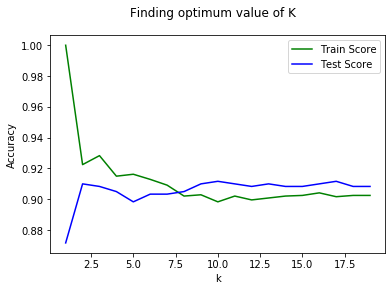

In [46]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.suptitle('Finding optimum value of K')
plt.legend()

Finding the train and test score from the graph we are considering knn = 7

In [47]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9092
Test score: 0.9033


Grid search approcah for parameter tuning

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kfold =KFold(n_splits=5, random_state=0)

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

test=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

In [49]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8925
Test 0.9033333333333333
parameters {'n_neighbors': 3}


In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 42  15]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.54      0.26      0.35        57

    accuracy                           0.91       600
   macro avg       0.73      0.62      0.65       600
weighted avg       0.89      0.91      0.89       600



Calculating the accuracy of the model

In [51]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, grid_search.predict(X_test))
knn_accuracy

0.9083333333333333

Calculating the precision_score of the model

In [52]:
from sklearn.metrics import precision_score
knn_precision = precision_score(y_test,grid_search.predict(X_test))
knn_precision

0.5357142857142857

Calculating the f1_score of the model

In [53]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, grid_search.predict(X_test))
knn_f1

0.35294117647058815

A dataframe to display the model, optimum parameter value. train_score, test_score, accuracy, precision and f1 score

In [54]:
model_results = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score','Accuracy','precision','f1'))

In [55]:
model_results.loc[len(model_results)]=[1,'K-neighbors',grid_search.best_params_,grid_search.best_score_,test, knn_accuracy, knn_precision, knn_f1]
model_results

S.No   Model_Name          Parameters  Train_Score  Test_Score  Accuracy  \
0    1  K-neighbors  {'n_neighbors': 3}       0.8925    0.903333  0.908333   

   precision        f1  
0   0.535714  0.352941

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
kfold =KFold(n_splits=5, random_state=0)

param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [57]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.8991666666666667
Test 0.9116666666666667
parameters {'C': 0.01, 'penalty': 'l2'}


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[526  17]
 [ 29  28]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       543
           1       0.62      0.49      0.55        57

    accuracy                           0.92       600
   macro avg       0.78      0.73      0.75       600
weighted avg       0.92      0.92      0.92       600



In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9233333333333333

In [60]:
precision = precision_score(y_test,grid_search.predict(X_test))
precision

0.6222222222222222

In [61]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.5490196078431373

In [62]:
model_results.loc[len(model_results)]=[2,'Logistic Regression',grid_search.best_params_, grid_search.best_score_,test, accuracy, precision, f1]
model_results

S.No           Model_Name                    Parameters  Train_Score  \
0    1          K-neighbors            {'n_neighbors': 3}     0.892500   
1    2  Logistic Regression  {'C': 0.01, 'penalty': 'l2'}     0.899167   

   Test_Score  Accuracy  precision        f1  
0    0.903333  0.908333   0.535714  0.352941  
1    0.903333  0.923333   0.622222  0.549020

# Linear Support Vector Machine

In [63]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 100]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

In [64]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8983333333333333
Test 0.9166340255110308
parameters {'C': 0.01}


In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 31  26]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       543
           1       0.67      0.46      0.54        57

    accuracy                           0.93       600
   macro avg       0.81      0.72      0.75       600
weighted avg       0.92      0.93      0.92       600



In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 31  26]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       543
           1       0.67      0.46      0.54        57

    accuracy                           0.93       600
   macro avg       0.81      0.72      0.75       600
weighted avg       0.92      0.93      0.92       600



In [67]:
precision =precision_score(y_test, grid_search.predict(X_test))
precision

0.6666666666666666

In [68]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.5416666666666666

In [69]:
model_results.loc[len(model_results)]=[3,'Linear SVC',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

S.No           Model_Name                    Parameters  Train_Score  \
0    1          K-neighbors            {'n_neighbors': 3}     0.892500   
1    2  Logistic Regression  {'C': 0.01, 'penalty': 'l2'}     0.899167   
2    3           Linear SVC                   {'C': 0.01}     0.898333   

   Test_Score  Accuracy  precision        f1  
0    0.903333  0.908333   0.535714  0.352941  
1    0.903333  0.923333   0.622222  0.549020  
2    0.916634  0.923333   0.666667  0.541667

# Support Vector Machine with RBF Kernel

In [70]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 10, 1],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [71]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8975
Test 0.9016611107252819
parameters {'C': 10, 'gamma': 0.01}


In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[519  24]
 [ 26  31]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       543
           1       0.56      0.54      0.55        57

    accuracy                           0.92       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.92      0.92      0.92       600



In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9166666666666666

In [74]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5636363636363636

In [75]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.5535714285714286

In [76]:
model_results.loc[len(model_results)]=[4,'SVC-RBF',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

S.No           Model_Name                    Parameters  Train_Score  \
0    1          K-neighbors            {'n_neighbors': 3}     0.892500   
1    2  Logistic Regression  {'C': 0.01, 'penalty': 'l2'}     0.899167   
2    3           Linear SVC                   {'C': 0.01}     0.898333   
3    4              SVC-RBF      {'C': 10, 'gamma': 0.01}     0.897500   

   Test_Score  Accuracy  precision        f1  
0    0.903333  0.908333   0.535714  0.352941  
1    0.903333  0.923333   0.622222  0.549020  
2    0.916634  0.923333   0.666667  0.541667  
3    0.901661  0.916667   0.563636  0.553571

# Support Vector Machine with Linear Kernel

In [77]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [78]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8954166666666666
Test 0.913328240387064
parameters {'C': 0.1}


In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[531  12]
 [ 40  17]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.59      0.30      0.40        57

    accuracy                           0.91       600
   macro avg       0.76      0.64      0.67       600
weighted avg       0.90      0.91      0.90       600



In [80]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9133333333333333

In [81]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5862068965517241

In [82]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.3953488372093023

In [83]:
model_results.loc[len(model_results)]=[5,'SVC-Linear',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

S.No           Model_Name                    Parameters  Train_Score  \
0    1          K-neighbors            {'n_neighbors': 3}     0.892500   
1    2  Logistic Regression  {'C': 0.01, 'penalty': 'l2'}     0.899167   
2    3           Linear SVC                   {'C': 0.01}     0.898333   
3    4              SVC-RBF      {'C': 10, 'gamma': 0.01}     0.897500   
4    5           SVC-Linear                    {'C': 0.1}     0.895417   

   Test_Score  Accuracy  precision        f1  
0    0.903333  0.908333   0.535714  0.352941  
1    0.903333  0.923333   0.622222  0.549020  
2    0.916634  0.923333   0.666667  0.541667  
3    0.901661  0.916667   0.563636  0.553571  
4    0.913328  0.913333   0.586207  0.395349

# Support Vector Machine with Poly Kernel

In [84]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\skle

In [85]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9004166666666666
Test 0.9033973424080376
parameters {'C': 1}


In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 41  16]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.55      0.28      0.37        57

    accuracy                           0.91       600
   macro avg       0.74      0.63      0.66       600
weighted avg       0.89      0.91      0.90       600



In [87]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.91

In [88]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5517241379310345

In [89]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.37209302325581395

In [90]:
model_results.loc[len(model_results)]=[6,'SVC-Poly',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

S.No           Model_Name                    Parameters  Train_Score  \
0    1          K-neighbors            {'n_neighbors': 3}     0.892500   
1    2  Logistic Regression  {'C': 0.01, 'penalty': 'l2'}     0.899167   
2    3           Linear SVC                   {'C': 0.01}     0.898333   
3    4              SVC-RBF      {'C': 10, 'gamma': 0.01}     0.897500   
4    5           SVC-Linear                    {'C': 0.1}     0.895417   
5    6             SVC-Poly                      {'C': 1}     0.900417   

   Test_Score  Accuracy  precision        f1  
0    0.903333  0.908333   0.535714  0.352941  
1    0.903333  0.923333   0.622222  0.549020  
2    0.916634  0.923333   0.666667  0.541667  
3    0.901661  0.916667   0.563636  0.553571  
4    0.913328  0.913333   0.586207  0.395349  
5    0.903397  0.910000   0.551724  0.372093

# Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

param_grid ={'max_depth': [1,2,3,4,5,6,7,8,9,10], }
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, return_train_score = True);

grid_search.fit(X_train, y_train)

test = cross_val_score(grid_search, X_test, y_test, cv = 5).mean();

In [92]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.90375
Test 0.9000222237655393
parameters {'max_depth': 4}


In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[526  17]
 [ 33  24]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       543
           1       0.59      0.42      0.49        57

    accuracy                           0.92       600
   macro avg       0.76      0.69      0.72       600
weighted avg       0.91      0.92      0.91       600



In [94]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9166666666666666

In [95]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5853658536585366

In [96]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.48979591836734687

In [97]:
model_results.loc[len(model_results)]=[7,'Decision tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

S.No           Model_Name                    Parameters  Train_Score  \
0    1          K-neighbors            {'n_neighbors': 3}     0.892500   
1    2  Logistic Regression  {'C': 0.01, 'penalty': 'l2'}     0.899167   
2    3           Linear SVC                   {'C': 0.01}     0.898333   
3    4              SVC-RBF      {'C': 10, 'gamma': 0.01}     0.897500   
4    5           SVC-Linear                    {'C': 0.1}     0.895417   
5    6             SVC-Poly                      {'C': 1}     0.900417   
6    7        Decision tree              {'max_depth': 4}     0.903750   

   Test_Score  Accuracy  precision        f1  
0    0.903333  0.908333   0.535714  0.352941  
1    0.903333  0.923333   0.622222  0.549020  
2    0.916634  0.923333   0.666667  0.541667  
3    0.901661  0.916667   0.563636  0.553571  
4    0.913328  0.913333   0.586207  0.395349  
5    0.903397  0.910000   0.551724  0.372093  
6    0.900022  0.916667   0.585366  0.489796

# Conclusion

From the above table, based on train, test score, accuracy and precision we concluded that SVC with Kernel Poly is the optimal classification model for our dataset

# Classification Task:
1.Apply two voting classifiers - one with hard voting and one with soft voting
2.Apply any two models with bagging and any two models with pasting.
3.Apply any two models with AdaBoost boosting
4.Apply one model with gradient boosting
5.Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
6.Apply deep learning models covered in class

# Soft Voting Classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [99]:
knn_clf = KNeighborsClassifier(6)
knn_clf.fit(X_train, y_train)
log_clf = LogisticRegression(C = 0.1, penalty = 'l1')
log_clf.fit(X_train, y_train)
svm_clf = LinearSVC(C = 1)
svm_clf.fit(X_train, y_train)
svmk_clf = SVC(kernel = 'linear',C = 0.01, probability = True)
svmk_clf.fit(X_train, y_train)
svmrbf_clf = SVC(kernel='rbf', C = 1, gamma = 0.01, probability = True)
svmrbf_clf.fit(X_train,y_train)
t_clf = DecisionTreeClassifier(max_depth =2)
t_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf),('lr', log_clf), ('svc_k', svmk_clf),('svc_rbf', svmrbf_clf),('tree', t_clf)], voting='soft')
voting_clf.fit(X_train, y_train)


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=6,
                                                   p=2, weights='uniform')),
                             ('lr',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                              

In [100]:
from sklearn.metrics import accuracy_score
for clf in (knn_clf, log_clf,svm_clf,svmk_clf, svmrbf_clf, t_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.9033333333333333
LogisticRegression 0.9266666666666666


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC 0.925
SVC 0.915
SVC 0.9133333333333333
DecisionTreeClassifier 0.91


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.9116666666666666


In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, clf.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, clf.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[532  11]
 [ 42  15]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.58      0.26      0.36        57

    accuracy                           0.91       600
   macro avg       0.75      0.62      0.66       600
weighted avg       0.89      0.91      0.90       600



In [102]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, clf.predict(X_test))
accuracy

0.9116666666666666

In [103]:
recall = recall_score(y_test, clf.predict(X_test))
recall

0.2631578947368421

In [104]:
precision = precision_score(y_test, clf.predict(X_test))
precision

0.5769230769230769

In [105]:
f1 = f1_score(y_test, clf.predict(X_test))
f1

0.3614457831325302

In [106]:
auc = roc_auc_score(y_test, clf.predict(X_test))
auc

0.6214500339245904

In [107]:
voting_results = pd.DataFrame(columns=('S.No','model_name','Accuracy','precision','recall', 'f1', 'AUC'))

In [108]:
voting_results.loc[len(voting_results)]=[1,'Soft Voting',accuracy, precision, recall, f1, auc]
voting_results

S.No   model_name  Accuracy  precision    recall        f1      AUC
0    1  Soft Voting  0.911667   0.576923  0.263158  0.361446  0.62145

Accuracy is the same . does not improve with soft voting.

# Hard Voting Classifier

In [109]:
knn_clf = KNeighborsClassifier(6)
knn_clf.fit(X_train, y_train)
log_clf = LogisticRegression(C = 0.1, penalty = 'l1')
log_clf.fit(X_train, y_train)
svm_clf = LinearSVC(C = 1)
svm_clf.fit(X_train, y_train)
svmk_clf = SVC(kernel = 'linear', C = 0.01, )
svmk_clf.fit(X_train, y_train)
svmrbf_clf = SVC(kernel='rbf', C = 1, gamma = 0.01)
svmrbf_clf.fit(X_train,y_train)
svmpoly_clf = SVC(kernel='poly', C = 1, gamma = 0.01)
svmpoly_clf.fit(X_train,y_train)
t_clf = DecisionTreeClassifier(max_depth = 2)
t_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf), ('svckernel', svmk_clf),('svcrbf', svmrbf_clf) , ('tree', t_clf)], voting='hard')
voting_clf.fit(X_train, y_train)


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

In [110]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, svmk_clf, svmrbf_clf, t_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.9266666666666666
KNeighborsClassifier 0.9033333333333333


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC 0.925
SVC 0.915
SVC 0.9133333333333333
DecisionTreeClassifier 0.91


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier 0.9133333333333333


In [111]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, clf.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, clf.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[535   8]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       543
           1       0.62      0.23      0.33        57

    accuracy                           0.91       600
   macro avg       0.77      0.61      0.64       600
weighted avg       0.90      0.91      0.89       600



In [112]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, clf.predict(X_test))
accuracy

0.9133333333333333

In [113]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, clf.predict(X_test))
recall

0.22807017543859648

In [114]:
precision = precision_score(y_test, clf.predict(X_test))
precision

0.6190476190476191

In [115]:
f1 = f1_score(y_test, clf.predict(X_test))
f1

0.3333333333333333

In [116]:
auc = roc_auc_score(y_test, clf.predict(X_test))
auc

0.6066686052146942

In [117]:
voting_results.loc[len(voting_results)]=[2,'Hard Voting',accuracy, precision, recall, f1, auc]
voting_results

S.No   model_name  Accuracy  precision    recall        f1       AUC
0    1  Soft Voting  0.911667   0.576923  0.263158  0.361446  0.621450
1    2  Hard Voting  0.913333   0.619048  0.228070  0.333333  0.606669

# Bagging with Svm-kernel

In [118]:
from sklearn.ensemble import BaggingClassifier

In [119]:
param_grid = {'n_estimators': [100,200,300],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(svmk_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [120]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8858333333333334
Test 0.9100366923628955
parameters {'max_samples': 100, 'n_estimators': 200}


In [121]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[543,   0],
       [ 54,   3]], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.91

In [123]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.05263157894736842

In [124]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

1.0

In [125]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.1

In [126]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5263157894736842

In [127]:
ensemble_results = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score','Accuracy','precision','recall','f1','AUC'))

In [128]:
ensemble_results.loc[len(ensemble_results)]=[1,'Bagging with SVM-kernel',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

S.No               Model_Name                                 Parameters  \
0    1  Bagging with SVM-kernel  {'max_samples': 100, 'n_estimators': 200}   

   Train_Score  Test_Score  Accuracy  precision    recall   f1       AUC  
0     0.885833    0.910037      0.91        1.0  0.052632  0.1  0.526316

With Bagging train score is slightly reduced for svn-kernel. AUC is reduced with bagging

# Bagging with Decision tree

In [129]:
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(t_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [130]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8966666666666666
Test 0.9099668958492488
parameters {'max_samples': 100, 'n_estimators': 200}


In [131]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[540,   3],
       [ 46,  11]], dtype=int64)

In [132]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9183333333333333

In [133]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.19298245614035087

In [134]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.7857142857142857

In [135]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.30985915492957744

In [136]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.593728797130949

In [137]:
ensemble_results.loc[len(ensemble_results)]=[2,'Bagging with Decision Tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

S.No                  Model_Name                                 Parameters  \
0    1     Bagging with SVM-kernel  {'max_samples': 100, 'n_estimators': 200}   
1    2  Bagging with Decision Tree  {'max_samples': 100, 'n_estimators': 200}   

   Train_Score  Test_Score  Accuracy  precision    recall        f1       AUC  
0     0.885833    0.910037  0.910000   1.000000  0.052632  0.100000  0.526316  
1     0.896667    0.909967  0.918333   0.785714  0.192982  0.309859  0.593729

AUC is reduced with bagging decision tree.test score slightly increased

In [138]:
bag_clf = BaggingClassifier(t_clf, n_estimators =400, max_samples = 100)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

# Pasting with SVM-kernel 

In [139]:
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(svmk_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [140]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8866666666666667
Test 0.9117033590295621
parameters {'max_samples': 100, 'n_estimators': 200}


In [141]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[543,   0],
       [ 55,   2]], dtype=int64)

In [142]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9083333333333333

In [143]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.03508771929824561

In [144]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

1.0

In [145]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.06779661016949151

In [146]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5175438596491229

In [147]:
ensemble_results.loc[len(ensemble_results)]=[3,'Pasting with SVM-Kernel',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

S.No                  Model_Name                                 Parameters  \
0    1     Bagging with SVM-kernel  {'max_samples': 100, 'n_estimators': 200}   
1    2  Bagging with Decision Tree  {'max_samples': 100, 'n_estimators': 200}   
2    3     Pasting with SVM-Kernel  {'max_samples': 100, 'n_estimators': 200}   

   Train_Score  Test_Score  Accuracy  precision    recall        f1       AUC  
0     0.885833    0.910037  0.910000   1.000000  0.052632  0.100000  0.526316  
1     0.896667    0.909967  0.918333   0.785714  0.192982  0.309859  0.593729  
2     0.886667    0.911703  0.908333   1.000000  0.035088  0.067797  0.517544

# Pasting with Decision tree

In [148]:
param_grid = {'n_estimators': [100,200,300,400,500],'max_samples':[1,10,100]}
grid_search = GridSearchCV(BaggingClassifier(t_clf), param_grid, cv=5, return_train_score=True);
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [149]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8945833333333333
Test 0.9116335625159154
parameters {'max_samples': 100, 'n_estimators': 500}


In [150]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[540,   3],
       [ 49,   8]], dtype=int64)

In [151]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9133333333333333

In [152]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.14035087719298245

In [153]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.7272727272727273

In [154]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.23529411764705882

In [155]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5674130076572648

In [156]:
ensemble_results.loc[len(ensemble_results)]=[4,'Pasting with Decision tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

S.No                  Model_Name                                 Parameters  \
0    1     Bagging with SVM-kernel  {'max_samples': 100, 'n_estimators': 200}   
1    2  Bagging with Decision Tree  {'max_samples': 100, 'n_estimators': 200}   
2    3     Pasting with SVM-Kernel  {'max_samples': 100, 'n_estimators': 200}   
3    4  Pasting with Decision tree  {'max_samples': 100, 'n_estimators': 500}   

   Train_Score  Test_Score  Accuracy  precision    recall        f1       AUC  
0     0.885833    0.910037  0.910000   1.000000  0.052632  0.100000  0.526316  
1     0.896667    0.909967  0.918333   0.785714  0.192982  0.309859  0.593729  
2     0.886667    0.911703  0.908333   1.000000  0.035088  0.067797  0.517544  
3     0.894583    0.911634  0.913333   0.727273  0.140351  0.235294  0.567413

# ADA Boost with Decision tree

In [157]:
from sklearn.ensemble import AdaBoostClassifier

In [158]:
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'n_estimators': [10, 50, 100],'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(t_clf, random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean()


In [159]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)


Train: 0.9033333333333333
Test 0.9033697941986712
parameters {'learning_rate': 0.1, 'n_estimators': 50}


In [160]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[527,  16],
       [ 33,  24]], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9183333333333333

In [162]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.42105263157894735

In [163]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.6

In [164]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.4948453608247421

In [165]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.6957933507802656

In [166]:
ensemble_results.loc[len(ensemble_results)]=[5,'Ada Boost with Decision Tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

S.No                    Model_Name  \
0    1       Bagging with SVM-kernel   
1    2    Bagging with Decision Tree   
2    3       Pasting with SVM-Kernel   
3    4    Pasting with Decision tree   
4    5  Ada Boost with Decision Tree   

                                   Parameters  Train_Score  Test_Score  \
0   {'max_samples': 100, 'n_estimators': 200}     0.885833    0.910037   
1   {'max_samples': 100, 'n_estimators': 200}     0.896667    0.909967   
2   {'max_samples': 100, 'n_estimators': 200}     0.886667    0.911703   
3   {'max_samples': 100, 'n_estimators': 500}     0.894583    0.911634   
4  {'learning_rate': 0.1, 'n_estimators': 50}     0.903333    0.903370   

   Accuracy  precision    recall        f1       AUC  
0  0.910000   1.000000  0.052632  0.100000  0.526316  
1  0.918333   0.785714  0.192982  0.309859  0.593729  
2  0.908333   1.000000  0.035088  0.067797  0.517544  
3  0.913333   0.727273  0.140351  0.235294  0.567413  
4  0.918333   0.600000  0.421053  0.494845  0.695793

# ADA Boost with Logistic

In [167]:
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'n_estimators': [10, 50, 100],'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(log_clf, random_state = 0), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean()


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [168]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)


Train: 0.8833333333333333
Test 0.905022455263097
parameters {'learning_rate': 0.1, 'n_estimators': 10}


In [169]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[543,   0],
       [ 57,   0]], dtype=int64)

In [170]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.905

In [171]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.0

In [172]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [173]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [174]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.5

In [175]:
ensemble_results.loc[len(ensemble_results)]=[6,'Ada Boost with Logistic',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

S.No                    Model_Name  \
0    1       Bagging with SVM-kernel   
1    2    Bagging with Decision Tree   
2    3       Pasting with SVM-Kernel   
3    4    Pasting with Decision tree   
4    5  Ada Boost with Decision Tree   
5    6       Ada Boost with Logistic   

                                   Parameters  Train_Score  Test_Score  \
0   {'max_samples': 100, 'n_estimators': 200}     0.885833    0.910037   
1   {'max_samples': 100, 'n_estimators': 200}     0.896667    0.909967   
2   {'max_samples': 100, 'n_estimators': 200}     0.886667    0.911703   
3   {'max_samples': 100, 'n_estimators': 500}     0.894583    0.911634   
4  {'learning_rate': 0.1, 'n_estimators': 50}     0.903333    0.903370   
5  {'learning_rate': 0.1, 'n_estimators': 10}     0.883333    0.905022   

   Accuracy  precision    recall        f1       AUC  
0  0.910000   1.000000  0.052632  0.100000  0.526316  
1  0.918333   0.785714  0.192982  0.309859  0.593729  
2  0.908333   1.000000  0.035088  0.067797  0.517544  
3  0.913333   0.727273  0.140351  0.235294  0.567413  
4  0.918333   0.600000  0.421053  0.494845  0.695793  
5  0.905000   0.000000  0.000000  0.000000  0.500000

# Gradient Boosting

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
param_grid = {'n_estimators': [100,200,300],'learning_rate' : [0.1, 0.5, 0.8], 'max_depth': [1,2,3,4]}
grid_search = GridSearchCV(GradientBoostingClassifier(init = t_clf), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [178]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.90125
Test 0.9149811329490474
parameters {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}


In [179]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
confusion

array([[519,  24],
       [ 29,  28]], dtype=int64)

In [180]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9116666666666666

In [181]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, grid_search.predict(X_test))
recall

0.49122807017543857

In [182]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5384615384615384

In [183]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.5137614678899082

In [184]:
auc = roc_auc_score(y_test, grid_search.predict(X_test))
auc

0.7235145875739072

In [185]:
ensemble_results.loc[len(ensemble_results)]=[7,'Gradient Boost with Decision', grid_search.best_params_, grid_search.best_score_,test, accuracy, precision, recall, f1, auc]
ensemble_results

S.No                    Model_Name  \
0    1       Bagging with SVM-kernel   
1    2    Bagging with Decision Tree   
2    3       Pasting with SVM-Kernel   
3    4    Pasting with Decision tree   
4    5  Ada Boost with Decision Tree   
5    6       Ada Boost with Logistic   
6    7  Gradient Boost with Decision   

                                          Parameters  Train_Score  Test_Score  \
0          {'max_samples': 100, 'n_estimators': 200}     0.885833    0.910037   
1          {'max_samples': 100, 'n_estimators': 200}     0.896667    0.909967   
2          {'max_samples': 100, 'n_estimators': 200}     0.886667    0.911703   
3          {'max_samples': 100, 'n_estimators': 500}     0.894583    0.911634   
4         {'learning_rate': 0.1, 'n_estimators': 50}     0.903333    0.903370   
5         {'learning_rate': 0.1, 'n_estimators': 10}     0.883333    0.905022   
6  {'learning_rate': 0.1, 'max_depth': 1, 'n_esti...     0.901250    0.914981   

   Accuracy  precision    recall        f1       AUC  
0  0.910000   1.000000  0.052632  0.100000  0.526316  
1  0.918333   0.785714  0.192982  0.309859  0.593729  
2  0.908333   1.000000  0.035088  0.067797  0.517544  
3  0.913333   0.727273  0.140351  0.235294  0.567413  
4  0.918333   0.600000  0.421053  0.494845  0.695793  
5  0.905000   0.000000  0.000000  0.000000  0.500000  
6  0.911667   0.538462  0.491228  0.513761  0.723515

# Gradient Boost with Decision is the best model comparing AUC with other models. Plotting ROC and Precision Recall graphs

# AUC -ROC -SVM-Kernel

In [186]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
param_grid = {'n_estimators': [100,200,300],'learning_rate' : [0.1, 0.5, 0.8], 'max_depth': [1,2,3,4]}
grid_search = GridSearchCV(GradientBoostingClassifier(init = t_clf), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

y_score_grad = grid_search.predict_proba(X_test)[:,-1]

average_precision = average_precision_score(y_test, y_score_grad)

print('Average precision-recall score LR: {}'.format(average_precision))

Average precision-recall score LR: 0.5476800536305743


C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


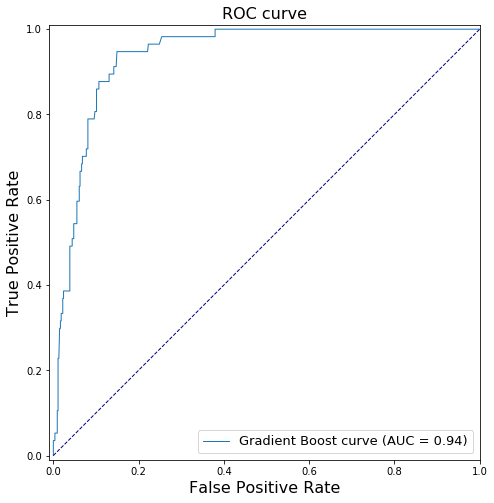

In [187]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

fpr_grad, tpr_grad, _ = roc_curve(y_test, y_score_grad)
roc_auc_grad = auc(fpr_grad, tpr_grad)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_grad, tpr_grad, lw=1, label='{} curve (AUC = {:0.2f})'.format('Gradient Boost',roc_auc_grad))


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

#  Gradient Boost with decision is the best model with AUC of 0.93

# PCA

In [188]:
X.shape

(3000, 54)

In [189]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [190]:
X_train_reduced.shape

(2400, 37)

In [191]:
X_test_reduced = pca.transform(X_test)

# PCA on KNN 

In [192]:
knn_clf.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [193]:
print('Train score: ', knn_clf.score(X_train_reduced, y_train))
print('Test score: ', knn_clf.score(X_test_reduced, y_test))

Train score:  0.9108333333333334
Test score:  0.9016666666666666


In [194]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn_clf.predict(X_test_reduced))
confusion

array([[532,  11],
       [ 48,   9]], dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_clf.predict(X_test_reduced))
accuracy

0.9016666666666666

In [196]:
precision = precision_score(y_test, knn_clf.predict(X_test_reduced))
precision

0.45

In [197]:
recall = recall_score(y_test, knn_clf.predict(X_test_reduced))
recall

0.15789473684210525

In [198]:
f1 = f1_score(y_test, knn_clf.predict(X_test_reduced))
f1


0.23376623376623376

In [199]:
auc = roc_auc_score(y_test, knn_clf.predict(X_test_reduced))
auc

0.5688184549772222

In [200]:
PCA_results = pd.DataFrame(columns=('S.No','Model_Name','Train_score','Test_Score', 'Accuracy','precision','recall','f1','AUC'))

In [201]:
PCA_results.loc[len(PCA_results)]=[1,'PCA - Knn',knn_clf.score(X_train_reduced, y_train),knn_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]

In [202]:
PCA_results

S.No Model_Name  Train_score  Test_Score  Accuracy  precision    recall  \
0    1  PCA - Knn     0.910833    0.901667  0.901667       0.45  0.157895   

         f1       AUC  
0  0.233766  0.568818

# PCA on Logistic Regression

In [203]:
log_clf.fit(X_train_reduced, y_train)

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
print('Train score: ', log_clf.score(X_train_reduced, y_train))
print('Test score: ', log_clf.score(X_test_reduced, y_test))

Train score:  0.9058333333333334
Test score:  0.92


In [205]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, log_clf.predict(X_test_reduced))
confusion

array([[528,  15],
       [ 33,  24]], dtype=int64)

In [206]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, log_clf.predict(X_test_reduced))
accuracy

0.92

In [207]:
precision = precision_score(y_test, log_clf.predict(X_test_reduced))
precision

0.6153846153846154

In [208]:
recall = recall_score(y_test, log_clf.predict(X_test_reduced))
recall

0.42105263157894735

In [209]:
f1 = f1_score(y_test, log_clf.predict(X_test_reduced))
f1


0.5

In [210]:
auc = roc_auc_score(y_test, log_clf.predict(X_test_reduced))
auc

0.6967141610933411

In [211]:
PCA_results.loc[len(PCA_results)]=[2, 'PCA-Logistic', log_clf.score(X_train_reduced, y_train),log_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]

In [212]:
PCA_results

S.No    Model_Name  Train_score  Test_Score  Accuracy  precision    recall  \
0    1     PCA - Knn     0.910833    0.901667  0.901667   0.450000  0.157895   
1    2  PCA-Logistic     0.905833    0.920000  0.920000   0.615385  0.421053   

         f1       AUC  
0  0.233766  0.568818  
1  0.500000  0.696714

# PCA on Linear SVM

In [213]:
svm_clf.fit(X_train_reduced, y_train)

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [214]:
print('Train score: ', svm_clf.score(X_train_reduced, y_train))
print('Test score: ', svm_clf.score(X_test_reduced, y_test))

Train score:  0.9054166666666666
Test score:  0.9183333333333333


In [215]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svm_clf.predict(X_test_reduced))
confusion

array([[527,  16],
       [ 33,  24]], dtype=int64)

In [216]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svm_clf.predict(X_test_reduced))
accuracy

0.9183333333333333

In [217]:
precision = precision_score(y_test, svm_clf.predict(X_test_reduced))
precision

0.6

In [218]:
recall = recall_score(y_test, svm_clf.predict(X_test_reduced))
recall

0.42105263157894735

In [219]:
f1 = f1_score(y_test, svm_clf.predict(X_test_reduced))
f1


0.4948453608247421

In [220]:
auc = roc_auc_score(y_test, svm_clf.predict(X_test_reduced))
auc

0.6957933507802656

In [221]:
PCA_results.loc[len(PCA_results)]=[3,'Linear SVC',svm_clf.score(X_train_reduced, y_train),svm_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

S.No    Model_Name  Train_score  Test_Score  Accuracy  precision    recall  \
0    1     PCA - Knn     0.910833    0.901667  0.901667   0.450000  0.157895   
1    2  PCA-Logistic     0.905833    0.920000  0.920000   0.615385  0.421053   
2    3    Linear SVC     0.905417    0.918333  0.918333   0.600000  0.421053   

         f1       AUC  
0  0.233766  0.568818  
1  0.500000  0.696714  
2  0.494845  0.695793

# PCA on RBF Kernel

In [222]:
svmrbf_clf.fit(X_train_reduced, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [223]:
print('Train score: ', svmrbf_clf.score(X_train_reduced, y_train))
print('Test score: ', svmrbf_clf.score(X_test_reduced, y_test))

Train score:  0.9179166666666667
Test score:  0.9116666666666666


In [224]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svmrbf_clf.predict(X_test_reduced))
confusion

array([[529,  14],
       [ 39,  18]], dtype=int64)

In [225]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svmrbf_clf.predict(X_test_reduced))
accuracy

0.9116666666666666

In [226]:
precision = precision_score(y_test, svmrbf_clf.predict(X_test_reduced))
precision

0.5625

In [227]:
recall = recall_score(y_test, svmrbf_clf.predict(X_test_reduced))
recall

0.3157894736842105

In [228]:
f1 = f1_score(y_test, svmrbf_clf.predict(X_test_reduced))
f1

0.4044943820224719

In [229]:
auc = roc_auc_score(y_test, svmrbf_clf.predict(X_test_reduced))
auc

0.6450033924590481

In [230]:
PCA_results.loc[len(PCA_results)]=[4,'SVC-Kernel RBF',svmrbf_clf.score(X_train_reduced, y_train),svmrbf_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

S.No      Model_Name  Train_score  Test_Score  Accuracy  precision  \
0    1       PCA - Knn     0.910833    0.901667  0.901667   0.450000   
1    2    PCA-Logistic     0.905833    0.920000  0.920000   0.615385   
2    3      Linear SVC     0.905417    0.918333  0.918333   0.600000   
3    4  SVC-Kernel RBF     0.917917    0.911667  0.911667   0.562500   

     recall        f1       AUC  
0  0.157895  0.233766  0.568818  
1  0.421053  0.500000  0.696714  
2  0.421053  0.494845  0.695793  
3  0.315789  0.404494  0.645003

# PCA on SVM with Linear Kernel

In [231]:
svmk_clf.fit(X_train_reduced, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [232]:
print('Train score: ', svmk_clf.score(X_train_reduced, y_train))
print('Test score: ', svmk_clf.score(X_test_reduced, y_test))

Train score:  0.8958333333333334
Test score:  0.915


In [233]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svmk_clf.predict(X_test_reduced))
confusion

array([[536,   7],
       [ 44,  13]], dtype=int64)

In [234]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svmk_clf.predict(X_test_reduced))
accuracy

0.915

In [235]:
precision = precision_score(y_test, svmk_clf.predict(X_test_reduced))
precision

0.65

In [236]:
recall = recall_score(y_test, svmk_clf.predict(X_test_reduced))
recall

0.22807017543859648

In [237]:
f1 = f1_score(y_test, svmk_clf.predict(X_test_reduced))
f1


0.33766233766233766

In [238]:
auc = roc_auc_score(y_test, svmk_clf.predict(X_test_reduced))
auc

0.6075894155277697

In [239]:
PCA_results.loc[len(PCA_results)]=[5,'SVC-Linear Kernel trick',svmk_clf.score(X_train_reduced, y_train),svmk_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

S.No               Model_Name  Train_score  Test_Score  Accuracy  precision  \
0    1                PCA - Knn     0.910833    0.901667  0.901667   0.450000   
1    2             PCA-Logistic     0.905833    0.920000  0.920000   0.615385   
2    3               Linear SVC     0.905417    0.918333  0.918333   0.600000   
3    4           SVC-Kernel RBF     0.917917    0.911667  0.911667   0.562500   
4    5  SVC-Linear Kernel trick     0.895833    0.915000  0.915000   0.650000   

     recall        f1       AUC  
0  0.157895  0.233766  0.568818  
1  0.421053  0.500000  0.696714  
2  0.421053  0.494845  0.695793  
3  0.315789  0.404494  0.645003  
4  0.228070  0.337662  0.607589

# PCA on SVM with Poly Kernel

In [240]:
svmpoly_clf.fit(X_train_reduced, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [241]:
print('Train score: ', svmk_clf.score(X_train_reduced, y_train))
print('Test score: ', svmk_clf.score(X_test_reduced, y_test))

Train score:  0.8958333333333334
Test score:  0.915


In [242]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, svmk_clf.predict(X_test_reduced))
confusion

array([[536,   7],
       [ 44,  13]], dtype=int64)

In [243]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svmk_clf.predict(X_test_reduced))
accuracy

0.915

In [244]:
precision = precision_score(y_test, svmk_clf.predict(X_test_reduced))
precision

0.65

In [245]:
recall = recall_score(y_test, svmk_clf.predict(X_test_reduced))
recall

0.22807017543859648

In [246]:
f1 = f1_score(y_test, svmk_clf.predict(X_test_reduced))
f1


0.33766233766233766

In [247]:
auc = roc_auc_score(y_test, svmk_clf.predict(X_test_reduced))
auc

0.6075894155277697

In [248]:
PCA_results.loc[len(PCA_results)]=[6,'SVC-Poly Kernel trick',svmk_clf.score(X_train_reduced, y_train),svmk_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

S.No               Model_Name  Train_score  Test_Score  Accuracy  precision  \
0    1                PCA - Knn     0.910833    0.901667  0.901667   0.450000   
1    2             PCA-Logistic     0.905833    0.920000  0.920000   0.615385   
2    3               Linear SVC     0.905417    0.918333  0.918333   0.600000   
3    4           SVC-Kernel RBF     0.917917    0.911667  0.911667   0.562500   
4    5  SVC-Linear Kernel trick     0.895833    0.915000  0.915000   0.650000   
5    6    SVC-Poly Kernel trick     0.895833    0.915000  0.915000   0.650000   

     recall        f1       AUC  
0  0.157895  0.233766  0.568818  
1  0.421053  0.500000  0.696714  
2  0.421053  0.494845  0.695793  
3  0.315789  0.404494  0.645003  
4  0.228070  0.337662  0.607589  
5  0.228070  0.337662  0.607589

# PCA on Decision Tree

In [249]:
t_clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [250]:
print('Train score: ', t_clf.score(X_train_reduced, y_train))
print('Test score: ', t_clf.score(X_test_reduced, y_test))

Train score:  0.8966666666666666
Test score:  0.905


In [251]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, t_clf.predict(X_test_reduced))
confusion

array([[534,   9],
       [ 48,   9]], dtype=int64)

In [252]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, t_clf.predict(X_test_reduced))
accuracy

0.905

In [253]:
precision = precision_score(y_test, t_clf.predict(X_test_reduced))
precision

0.5

In [254]:
recall = recall_score(y_test, t_clf.predict(X_test_reduced))
recall

0.15789473684210525

In [255]:
f1 = f1_score(y_test, t_clf.predict(X_test_reduced))
f1

0.23999999999999996

In [256]:
auc = roc_auc_score(y_test, t_clf.predict(X_test_reduced))
auc

0.5706600756033731

In [257]:
PCA_results.loc[len(PCA_results)]=[7,'Decision Tree Classifier',t_clf.score(X_train_reduced, y_train),t_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]

In [258]:
PCA_results

S.No                Model_Name  Train_score  Test_Score  Accuracy  \
0    1                 PCA - Knn     0.910833    0.901667  0.901667   
1    2              PCA-Logistic     0.905833    0.920000  0.920000   
2    3                Linear SVC     0.905417    0.918333  0.918333   
3    4            SVC-Kernel RBF     0.917917    0.911667  0.911667   
4    5   SVC-Linear Kernel trick     0.895833    0.915000  0.915000   
5    6     SVC-Poly Kernel trick     0.895833    0.915000  0.915000   
6    7  Decision Tree Classifier     0.896667    0.905000  0.905000   

   precision    recall        f1       AUC  
0   0.450000  0.157895  0.233766  0.568818  
1   0.615385  0.421053  0.500000  0.696714  
2   0.600000  0.421053  0.494845  0.695793  
3   0.562500  0.315789  0.404494  0.645003  
4   0.650000  0.228070  0.337662  0.607589  
5   0.650000  0.228070  0.337662  0.607589  
6   0.500000  0.157895  0.240000  0.570660

When tabular results of after PCA are compared to before PCA, we found that all the models have been improved in either the train or test score or both.
Especially, we found that the best model from Project 1-SVC with Poly kernel has improved in its test score a little more after PCA.

# Apply Deep Learning models

In [259]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Amritha_Rekha\Anaconda3\lib\site-packages\tensorflow\python\framework\dty

In [260]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 54, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))
#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

### Perceptron Evaluation Metrics

In [261]:
#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 75, batch_size = 200);

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2400 samples
Epoch 1/75
2400/2400 [==============================] - 0s 33us/sample - loss: 0.5664 - accuracy: 0.7158
Epoch 2/75
2400/2400 [==============================] - 0s 5us/sample - loss: 0.5004 - accuracy: 0.7692
Epoch 3/75
2400/2400 [==============================] - 0s 5us/sample - loss: 0.4475 - accuracy: 0.8054
Epoch 4/75
2400/2400 [==============================] - 0s 5us/sample - loss: 0.4063 - accuracy: 0.8350
Epoch 5/75
2400/2400 [==============================] - 0s 5us/sample - loss: 0.3737 - accuracy: 0.8562
Epoch 6/75
2400/2400 [==============================] - 0s 5us/sample - loss: 0.3489 - accuracy: 0.8712
Epoch 7/75
2400/2400 [==============================] - 0s 5us/sample - loss: 0.3285 - accuracy: 0.8800
Epoch 8/75
2400/2400 [==============================] - 0s 5us/sample - loss: 0.3121 - accuracy: 0.8879
Epoch 9/75
2400/2400 [=============================

In [262]:
model1.evaluate(X_test, y_test)

600/600 [==============================] - 0s 60us/sample - loss: 0.1852 - accuracy: 0.9150


[0.18522298177083332, 0.915]

### Perceptron Prediction Score

In [263]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [264]:

print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.7523364485981309
test 0.5535714285714286


# 2.Multi-Level Perceptron

In [265]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 54, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 100, batch_size = 200);

Train on 2400 samples
Epoch 1/100
2400/2400 [==============================] - 0s 31us/sample - loss: 0.7490 - accuracy: 0.4179
Epoch 2/100
2400/2400 [==============================] - 0s 5us/sample - loss: 0.5215 - accuracy: 0.7950
Epoch 3/100
2400/2400 [==============================] - 0s 5us/sample - loss: 0.4061 - accuracy: 0.8788
Epoch 4/100
2400/2400 [==============================] - 0s 5us/sample - loss: 0.3506 - accuracy: 0.8842
Epoch 5/100
2400/2400 [==============================] - 0s 5us/sample - loss: 0.3236 - accuracy: 0.8846
Epoch 6/100
2400/2400 [==============================] - 0s 5us/sample - loss: 0.3046 - accuracy: 0.8842
Epoch 7/100
2400/2400 [==============================] - 0s 6us/sample - loss: 0.2880 - accuracy: 0.8888
Epoch 8/100
2400/2400 [==============================] - 0s 6us/sample - loss: 0.2743 - accuracy: 0.8913
Epoch 9/100
2400/2400 [==============================] - 0s 5us/sample - loss: 0.2624 - accuracy: 0.8954
Epoch 10/100
2400/2400 [========

### Multi Layer Perceptron Evaluation Metrics

In [266]:
model1.evaluate(X_test, y_test)

600/600 [==============================] - 0s 66us/sample - loss: 0.3751 - accuracy: 0.9200


[0.37507581412792207, 0.92]

In [267]:
model1.evaluate(X_train, y_train)

2400/2400 [==============================] - 0s 14us/sample - loss: 0.0191 - accuracy: 0.9975


[0.019147461170020204, 0.9975]

### Multi Layer Perceptron Precision Scores

In [268]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [269]:
print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.9892857142857143
test 0.5692307692307692
